The final solution weights: [ 3 14  1]
Number of iterations: 97
Final temperature: 0.0009658496786487173
Final delta E value: 0.13266306112630244


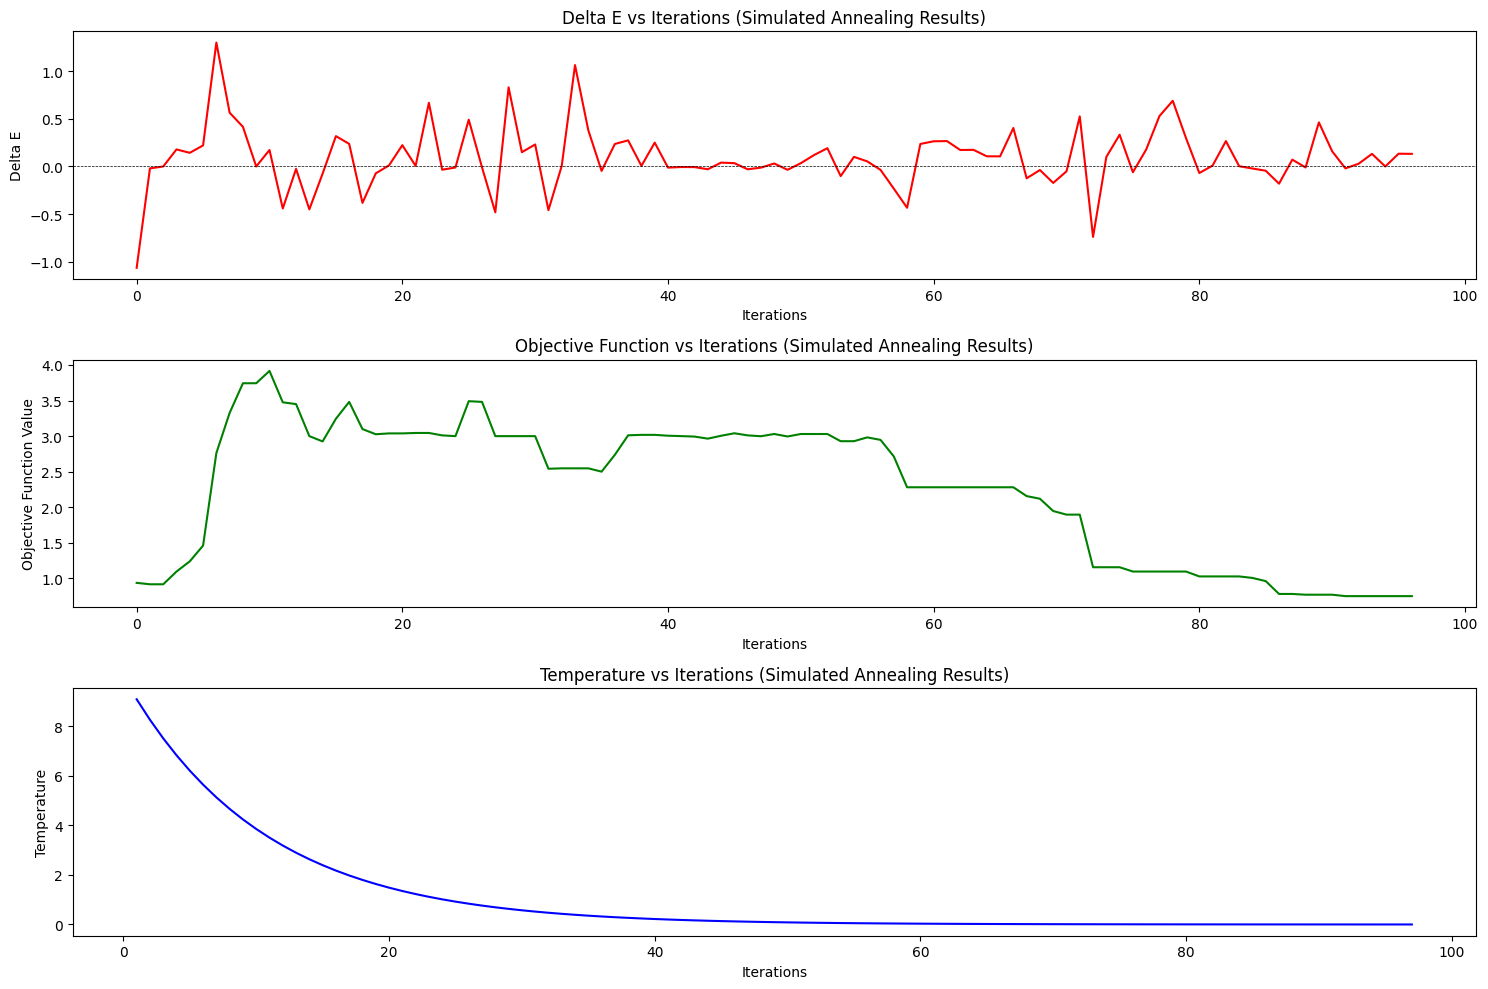

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
# Constants for the problem
INITIAL_WEIGHTS = np.array([0, 0, 0])  # values for Wx, Wy, Wb
OR = [0, 1, 1, 1]
XY = [[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the error function based on the sigmoid formula
def calculate_error(weights):
    total_error = 0
    for i in range(len(OR)):
        value = np.dot(XY[i], weights)  # X * Wx + Y * Wy + 1 * Wb
        prediction = sigmoid(value)
        error = np.abs(OR[i] - prediction)
        total_error += error
    return total_error

# Temperature scheduling function with division by 1.2
def schedule(T):
    return T / 1.1 #Temperature: T.Next =  T.current/1.2

# Function to create a random neighbor (Current config + RANDBETWEEN(-2, 2))
def make_node(current):
    # Generate random changes for each weight component Wx, Wy, and Wb
    random_change = np.array([random.randint(-2, 2), random.randint(-2, 2), random.randint(-2, 2)])
    return current + random_change


# Simulated Annealing function with temperature decrease and iteration tracking
def simulated_annealing(problem, initial_temperature):
    current = INITIAL_WEIGHTS.copy()
    current_value = calculate_error(current)

    # Initial temperature
    T = initial_temperature

    # Lists to track temperatures and errors
    temperatures = []
    iterations = []
    error_history = []
    delta_E_values = []

    tolerance = 1e-3  # Convergence criterion for error change

    for t in range(1, 1000):  # Arbitrarily high number of iterations
        if T < tolerance:  # Stop if temperature is too low
            return current, temperatures, iterations, error_history, delta_E_values

        next_node = make_node(current)
        next_value = calculate_error(next_node)
        delta_E = next_value - current_value

        if delta_E < 0:  # Accept the move if error decreases
            current = next_node
            current_value = next_value
        else:  # Accept with probability based on temperature
            acceptance_probability = np.exp(-delta_E / T)
            if random.random() < acceptance_probability:
                current = next_node
                current_value = next_value

        # Update temperature based on the new schedule
        T = schedule(T)

        # Track temperature, iteration, and error history
        temperatures.append(T)
        iterations.append(t)
        error_history.append(current_value)
        delta_E_values.append(delta_E)

    return current, temperatures, iterations, error_history, delta_E_values

# Function to plot results
def plot_results(error_history, temperatures, iterations, delta_E_values, title):
    plt.figure(figsize=(15, 10))

    # Plot Temperature vs Iterations
    plt.subplot(3, 1, 3)
    plt.plot(iterations, temperatures, color='blue')
    plt.title(f'Temperature vs Iterations ({title})')
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')

    # Plot Delta E vs Iterations
    plt.subplot(3, 1, 1)
    plt.plot(range(len(delta_E_values)), delta_E_values, color='red')
    plt.title(f'Delta E vs Iterations ({title})')
    plt.xlabel('Iterations')
    plt.ylabel('Delta E')
    plt.axhline(0, color='black', lw=0.5, ls='--')  # Line at zero for reference

    # Plot Objective Function vs Iterations
    plt.subplot(3, 1, 2)
    plt.plot(range(len(error_history)), error_history, color='green')
    plt.title(f'Objective Function vs Iterations ({title})')
    plt.xlabel('Iterations')
    plt.ylabel('Objective Function Value')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    initial_temp = 10  # Starting temperature
    # Run the simulated annealing algorithm with an initial temperature of 10
    final_solution, temperatures, iterations, error_history, delta_E_values = simulated_annealing(None, 10)
    final_error = calculate_error(final_solution)

    # Print results
    print(f"The final solution weights: {final_solution}")
    print(f"Number of iterations: {iterations[-1]}")
    print(f"Final temperature: {temperatures[-1]}")
    print(f"Final delta E value: {delta_E_values[-1]}")

   # Plot the results with a title
    plot_results(error_history, temperatures, iterations, delta_E_values, "Simulated Annealing Results")
